# Comparing gini impurity to entropy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def gini(x):
    states = list(set(x))
    counts = [np.sum(np.array(x)==i) for i in states]
    return 1-np.sum(np.square(counts/np.sum(counts)))
    
x = [1,1,2]
gini(x)

0.4444444444444444

In [37]:
def entropy(x):
    states = list(set(x))
    p = [np.sum(np.array(x)==i) for i in states]
    p = p/np.sum(p)
    return np.sum(-p*np.log(p))
    
x = [1,1,2]
entropy(x)

0.6365141682948128

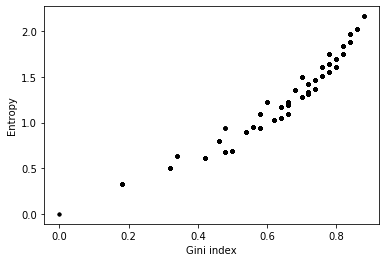

In [60]:
n = 10000
length = 10

data = np.zeros((n,2))
for i in range(n):
    ngroups = np.random.randint(2,length)
    x = np.random.randint(ngroups, size=length)
    data[i,:] = [gini(x), entropy(x)]
    
plt.plot(data[:,0], data[:,1], 'k.');
plt.xlabel('Gini index');
plt.ylabel('Entropy');

In [80]:
def allsums(n,k):
    """All sums of k numbers that sum to n."""
    if k==1: return [[n]]
    return [[i]+j for i in range(n) for j in allsums(n-i,k-1)]

allsums(3,3)

[[0, 0, 3], [0, 1, 2], [0, 2, 1], [1, 0, 2], [1, 1, 1], [2, 0, 1]]

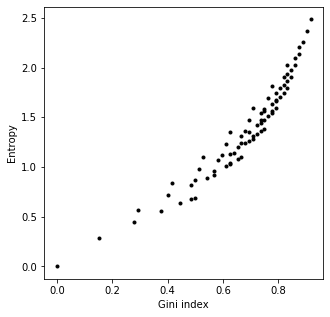

In [103]:
length = 12
vocab = 12

plt.figure(figsize=(5,5))
combos = set([tuple(sorted(a)) for a in allsums(length,vocab)])
for combo in combos:
    v = sum([[i]*combo[i] for i in range(vocab)], []) # That's how you flattan an array
    # (See https://docs.python.org/3/library/functions.html#sum )
    #print(combo,v)
    plt.plot(gini(v), entropy(v), 'k.');

plt.xlabel('Gini index');
plt.ylabel('Entropy');